# PythonLibraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

# import data

In [10]:
filename="C:/Data/iris.xls"

In [11]:
data=pd.read_excel(filename)

In [12]:
data_copy=data.copy()

In [13]:
#see the first 10 lines of data
data.head(10)

## iris data contains the length and width of sepals and petals including the Classification column with the classes of Iris flowers that we need to classify (eg: Setosa(0), Versicolor(1),  Virginica(2) ).

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Analyze Data

In [14]:
# -- Dimension of the data
data.shape  

#--- O/P
# 150 rows & 5 columns

(150, 5)

In [15]:
# -- Columns
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [16]:
# ----------------- concise info  ----------

data.info()

#--- O/P
# 3 numerical columns & 1 categorical column
# Null values are present in columns : SL,SW & PL
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
# Descriptive Statistical summary of the Data Frame
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Check for duplicate data 

In [18]:
data.duplicated().sum()

# -- O/P
# -- 3 duplicates

3

In [19]:
# --- Identify the duplicate data

data[data.duplicated()]


,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [20]:
#---- Drop the duplicates

data.drop_duplicates(inplace=True)

In [21]:
#----Verify if the duplicates are removed
data[data.duplicated()]

,SL,SW,PL,PW,Classification


## Handling the null values 


In [22]:
#check how many values are missing (NaN)/null values
data.isnull().sum() # the number of missing values for every column

# -- O/P
# [SL] --> 7 nullvalues
# [SW] --> 6 nullvalues
# [PL] --> 6 nullvalues



SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [23]:
# check the Unique values to check for incorrect/null data

data['SL'].unique()

array([5.1, 4.9, nan, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 4.7,
       5.5, 4.5, 5.3, 7. , 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.4, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [24]:
data['SW'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, nan, 4. , 4.4, 3.8, 3.7,
       3.3, 4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [25]:
data['PL'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, nan, 4.7, 4.5, 4.9,
       4. , 4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8,
       3.7, 5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.1, 6.4, 5.4, 5.2])

In [26]:
data["PW"].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [25]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Replace NaN with Mean


In [27]:
# SW - round off the Mean to 1 decimal point
column_mean=round(data['SW'].mean(),1)
data['SW'].fillna(column_mean,inplace=True)

In [28]:
data['SW'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 4. , 4.4, 3.8, 3.7, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [29]:
column_mean=round(data['SL'].mean(),1)
data['SL'].fillna(column_mean,inplace=True)

In [30]:
data['SL'].unique()

array([5.1, 4.9, 5.9, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 4.7,
       5.5, 4.5, 5.3, 7. , 6.9, 6.5, 6.3, 6.6, 6. , 6.1, 5.6, 6.7, 6.2,
       6.4, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [31]:
column_mean=round(data['PL'].mean(),1)
data['PL'].fillna(column_mean,inplace=True)

In [32]:
data['PL'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 3.8, 4.7, 4.5, 4.9,
       4. , 4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 5.3, 5.5, 6.7, 6.9, 5.7,
       6.1, 6.4, 5.4, 5.2])

In [33]:
data.isnull().sum()

# Verified that the null values are now removed from data

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Treat Outliers

In [34]:
#numerical column- 
num_data=data.select_dtypes(include=['float64'])
num_data

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.9,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,3.8,2.0
148,6.2,3.4,5.4,2.3


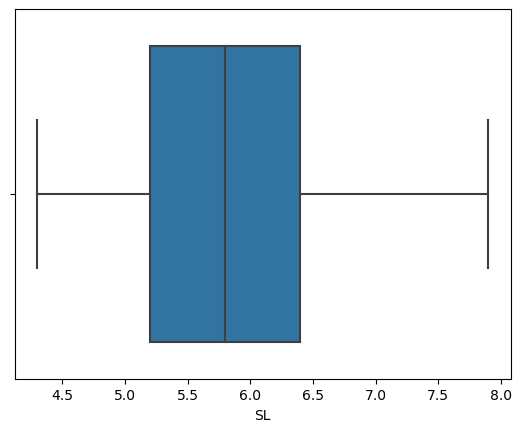

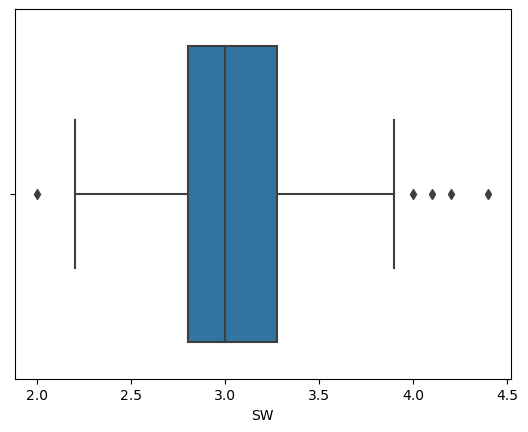

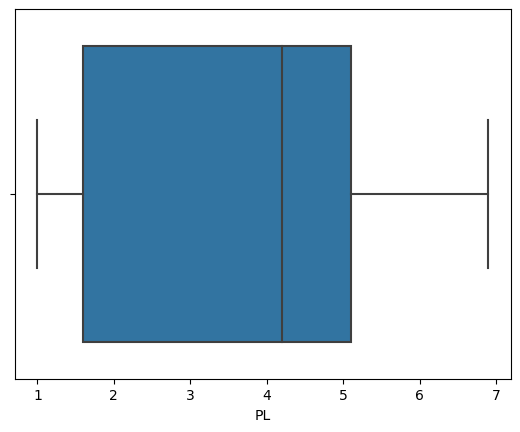

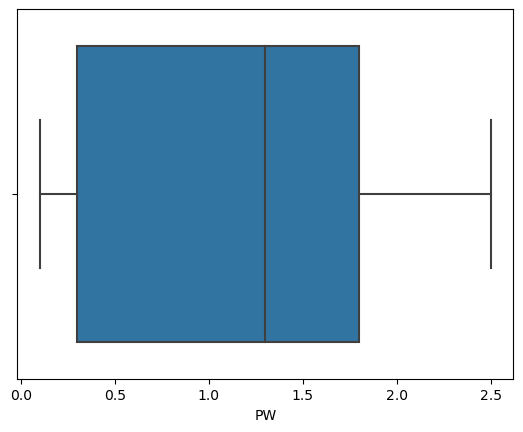

In [35]:
# Find outliers by plotting all columns in Boxplot

for i in num_data:
    sns.boxplot(x=num_data[i])
    plt.show()
    
#--- O/P --
# Outliers found in SW    

## Treat Outliers in SW using IQR

In [35]:
# ---- Treat Outliers in SW using IQR

IQR=stats.iqr(data.SW,interpolation='midpoint')

IQR

0.5

In [36]:
Q1=data.SW.quantile(0.25)
Q3=data.SW.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.05, 4.05)

In [37]:
data.loc[data['SW']>max_limit]

# --- O/P ---
# 4 observations with greater than max_limit

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [38]:
data.loc[data['SW']<min_limit]

# --- O/P ---
# 1 observation with less than min_limit

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [39]:
# Replace the outliers wth Median
data.loc[data['SW']>max_limit,'SW']=np.median(data.SW)

In [40]:
# Replace the outliers wth Median
data.loc[data['SW']<min_limit,'SW']=np.median(data.SW)

In [41]:
#sns.boxplot(x=data["SW"])
#plt.show()

In [42]:
data.loc[data['SW']>max_limit]

,SL,SW,PL,PW,Classification


In [43]:
data.loc[data['SW']<min_limit]

,SL,SW,PL,PW,Classification


# Encoding categorical data

# Visualizing Data-Multivariate Plots 

##  1. correlation matrix

In [44]:
# Find the correlation to understand the relationship between data

corr=data.corr()
corr

#-- Highest correlation is between PL and PW
#--- second highest correlation is between SL and PL

,SL,SW,PL,PW
SL,1.000000,-0.099142,0.829207,0.798883
SW,-0.099142,1.000000,-0.378657,-0.302281
PL,0.829207,-0.378657,1.000000,0.934714
PW,0.798883,-0.302281,0.934714,1.000000


<AxesSubplot:>

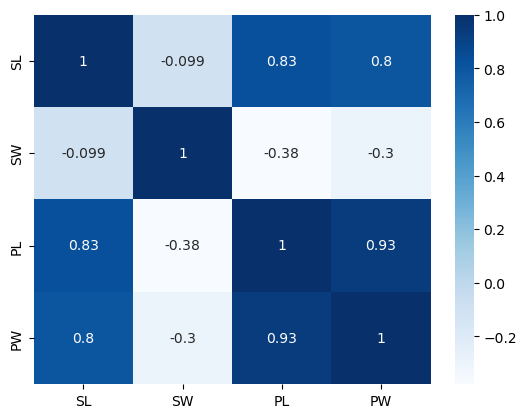

In [45]:
# Plot the correlation matrix

sns.heatmap(corr,annot=True,cmap="Blues")

# 2. ScatterPlot

In [46]:
df=data_copy
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
setosa=df[df.Classification=='Iris-setosa']
versicolor=df[df.Classification=='Iris-versicolor']
virginica=df[df.Classification=='Iris-virginica']

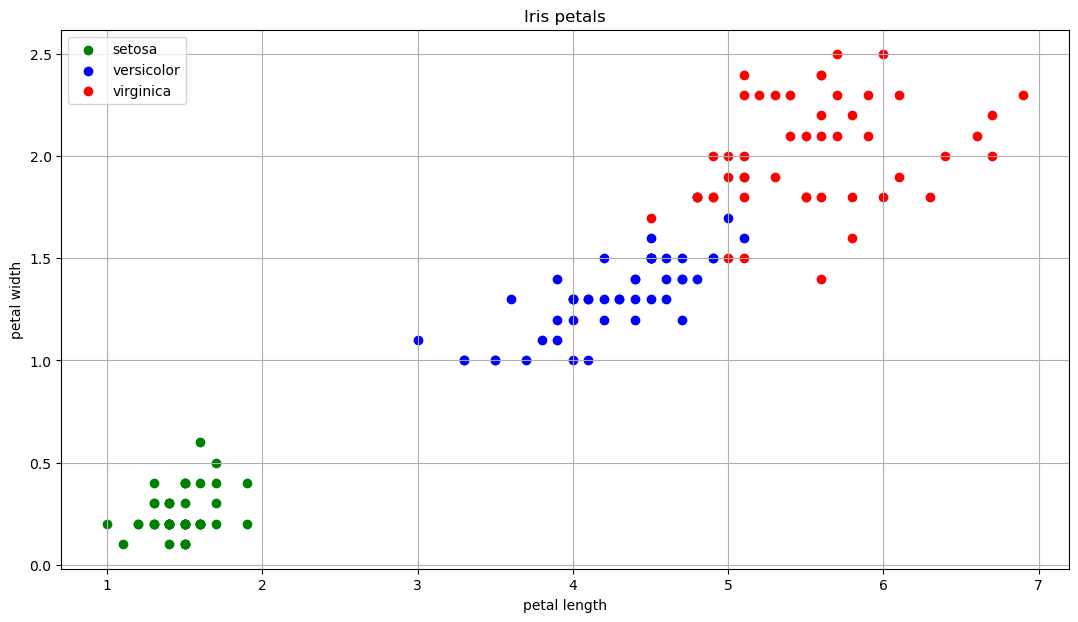

In [48]:
fig,ax=plt.subplots()
fig.set_size_inches(13,7)

ax.scatter(setosa['PL'],setosa['PW'],label='setosa',facecolor='green')
ax.scatter(versicolor['PL'],versicolor['PW'],label='versicolor',facecolor='blue')
ax.scatter(virginica['PL'],virginica['PW'],label='virginica',facecolor='red')

ax.set_xlabel("petal length")  # PL
ax.set_ylabel("petal width")  #PW
ax.grid()
ax.set_title("Iris petals")
ax.legend()

#--- Observations
# virginica has larger petals than versicolor and setosa

# Split the dataset into the training and test sets

In [49]:
# -----------------Split Dependent and Independent variable 

#Target Variable\Dependent variable Y = data.Classification
# Independent variable x contains all the input variables such as independent features

#x=data.iloc[:,:4]
#y=data.iloc[:,0:4]

x=data.iloc[:,:4]
y=data.iloc[:,4]
x,y

(      SL   SW   PL   PW
 0    5.1  3.5  1.4  0.2
 1    4.9  3.0  1.4  0.2
 2    5.9  3.2  1.3  0.2
 3    4.6  3.1  1.5  0.2
 4    5.0  3.6  1.4  0.2
 ..   ...  ...  ...  ...
 145  6.7  3.0  5.2  2.3
 146  6.3  2.5  5.0  1.9
 147  6.5  3.0  3.8  2.0
 148  6.2  3.4  5.4  2.3
 149  5.9  3.0  5.1  1.8
 
 [147 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: Classification, Length: 147, dtype: object)

In [50]:
#--- Scale the independaent feature data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [52]:
# ----------------- Split the data into Test & Train data ------------

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
#x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [53]:
print(x_train.shape)
print(y_train.shape)

(117, 4)
(117,)


In [54]:
print(x_test.shape)
print(y_test.shape)

(30, 4)
(30,)


# 1. Logistic Regression

In [55]:
#------------------ model creation --------------------
class_model=LogisticRegression()

#--------------  train the model ,fit the model with the training data -----------------

class_model.fit(x_train,y_train)




LogisticRegression()

In [56]:
# ----------------- predict the results ----------------

y_pred=class_model.predict(x_test)

In [57]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [58]:
# --------------------- Find the accuracy of the model and view the confusion matrix------------

confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 1,  8,  1],
       [ 0,  0,  9]], dtype=int64)

In [59]:
accuracy_linear=accuracy_score(y_test,y_pred)*100
print('Accuracy of the model is',accuracy_linear)


Accuracy of the model is 93.33333333333333


In [64]:
precision_linear= precision_score(y_test,y_pred,average='micro')*100
print('Precision of the model is',precision_linear)

Precision of the model is 93.33333333333333


# 2. KNN model

C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

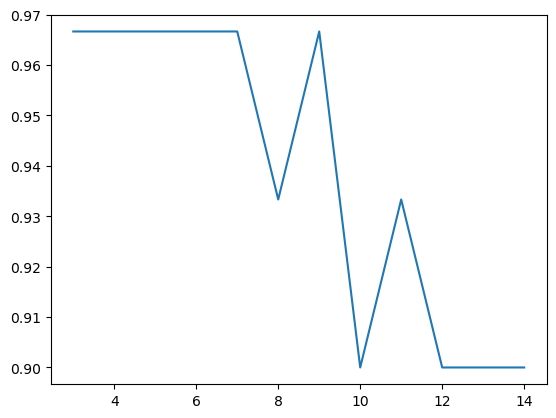

In [67]:
#knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
#knn.fit(x_train, y_train)
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k , metric ='euclidean')
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)
plt.plot(neighbors,metric_k)
plt.xlabel='K'
plt.ylabel='Accuracy'
plt.show()



In [68]:
#  Higher accuracy for k values 3,7 & 9
knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [69]:
# ----------------- predict the results ----------------

y_pred_knn=knn.predict(x_test)

C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
y_pred_knn

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [70]:
y_pred_knn.size

30

In [72]:
Accuracy_score_knn= accuracy_score(y_pred_knn,y_test)*100
print(Accuracy_score_knn)

96.66666666666667


In [73]:
precision_knn= precision_score(y_test,y_pred_knn,average='micro')*100
print('Precision of the model is',precision_knn)

Precision of the model is 96.66666666666667


In [77]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

# 3. SVC model

###  Kernel type='rbf'

In [74]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

SVC(gamma=0.1, random_state=0)

In [75]:
y_pred_svm=svm.predict(x_test)

In [76]:
y_pred_svm

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [77]:
accuracy_score_svc_rbf=accuracy_score(y_test,y_pred_svm)*100
print('Accuracy=',accuracy_score_svc_rbf)


Accuracy= 96.66666666666667


In [78]:
precision_svm_rbf= precision_score(y_test,y_pred_svm,average='micro')*100
print('Precision of the model is',precision_svm_rbf)

Precision of the model is 96.66666666666667


In [79]:
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_svm))

confusion_matrix 
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


###  Kernel type='linear'

In [80]:
svm_ln = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm_ln.fit(x_train, y_train)

SVC(gamma=0.1, random_state=0)

In [81]:
y_pred_svm_ln=svm_ln.predict(x_test)

In [82]:
y_pred_svm_ln

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [83]:
accuracy_score_svc_ln=accuracy_score(y_test,y_pred_svm_ln)*100
print('Accuracy=',accuracy_score_svc_ln)


Accuracy= 96.66666666666667


In [84]:
precision_svm_ln= precision_score(y_test,y_pred_svm_ln,average='micro')*100
print('Precision of the model is',precision_svm_ln)

Precision of the model is 96.66666666666667


In [92]:
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_svm_ln))

confusion_matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


###  Kernel type='poly'

In [85]:
svm_poly = SVC(kernel='poly', random_state=0, gamma=.10, C=1.0)
svm_poly.fit(x_train, y_train)

SVC(gamma=0.1, kernel='poly', random_state=0)

In [86]:
y_pred_svm_poly=svm_poly.predict(x_test)

In [87]:
y_pred_svm_poly

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [88]:
accuracy_score_svc_ply =accuracy_score(y_test,y_pred_svm_poly)*100
print('Accuracy=',accuracy_score_svc_ply)

Accuracy= 86.66666666666667


In [89]:
precision_svm_ply= precision_score(y_test,y_pred_svm_poly,average='micro')*100
print('Precision of the model is',precision_svm_ply)

Precision of the model is 86.66666666666667


In [90]:
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_svm_poly))

confusion_matrix 
 [[11  0  0]
 [ 0 10  0]
 [ 0  4  5]]


# 4. Decision Tree

In [91]:
dt_clf=DecisionTreeClassifier(random_state=42)

In [92]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [93]:
y_pred_dt=dt_clf.predict(x_test)

In [94]:
accuracy_score_dt=accuracy_score(y_test,y_pred_dt)*100
print('Accuracy=',accuracy_score_dt)

Accuracy= 93.33333333333333


In [95]:
precision_dt= precision_score(y_test,y_pred_dt,average='micro')*100
print('Precision of the model is',precision_dt)

Precision of the model is 93.33333333333333


In [96]:
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_dt))

confusion_matrix 
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


# 5. Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
y_pred_rf=rf_clf.predict(x_test)

In [100]:
accuracy_score_rf=accuracy_score(y_test,y_pred_rf)*100
print('Accuracy=',accuracy_score_rf)

Accuracy= 93.33333333333333


In [101]:
precision_rf= precision_score(y_test,y_pred_rf,average='micro')*100
print('Precision of the model is',precision_rf)

Precision of the model is 93.33333333333333


In [102]:
print('confusion_matrix \n',confusion_matrix(y_test,y_pred_rf))

confusion_matrix 
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


# Test with random data

In [115]:
features=[[ 5.1 ,3.5 ,1.4 , 0.2]]
#fratures=features.Shape(-1,1)
print('Linear Regression: ',class_model.predict(features))
print('KNN: ',knn.predict(features))
print("SVM :")
print('    Poly :',svm_poly.predict(features))
print('    linear:',svm_ln.predict(features))
print('    rbf:',svm.predict(features))
print('Decision Tree:',dt_clf.predict(features))
print('Random Forest:',rf_clf.predict(features))

Linear Regression:  ['Iris-versicolor']
KNN:  ['Iris-virginica']
SVM :
    Poly : ['Iris-virginica']
    linear: ['Iris-virginica']
    rbf: ['Iris-virginica']
Decision Tree: ['Iris-virginica']
Random Forest: ['Iris-virginica']


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Comparison and Conclusion

In [103]:
from prettytable import PrettyTable

In [104]:
summaryTable=PrettyTable(["Classification Model", "Accuracy Score","Precision Score"])

In [105]:
summaryTable.add_row(['Linear Regression',accuracy_linear,precision_linear])
summaryTable.add_row(['KNN',Accuracy_score_knn,precision_knn])
summaryTable.add_row(['SVC - rbf ',accuracy_score_svc_rbf,precision_svm_rbf])
summaryTable.add_row(['SVC - Linear ',accuracy_score_svc_ln,precision_svm_ln])
summaryTable.add_row(['SVC - poly ',accuracy_score_svc_ply,precision_svm_ply])
summaryTable.add_row(['Decision Tree',accuracy_score_dt,precision_dt])
summaryTable.add_row(['Random Forest',accuracy_score_rf,precision_rf])

In [106]:
summaryTable

Classification Model,Accuracy Score,Precision Score
Linear Regression,93.33333333333333,93.33333333333333
KNN,96.66666666666667,96.66666666666667
SVC - rbf,96.66666666666667,96.66666666666667
SVC - Linear,96.66666666666667,96.66666666666667
SVC - poly,86.66666666666667,86.66666666666667
Decision Tree,93.33333333333333,93.33333333333333
Random Forest,93.33333333333333,93.33333333333333
